In [ ]:
#การคำนวณ แบบฝึก3-2
import numpy as np
ar = np.array([[1,0,1],[0,1,0],[1,0,1]])

#1
ar1 = np.array([[0,0,0],[0,1,2],[0,4,5]])
array1=ar1*ar
print(array1)
print("A11 =" ,sum(array1))
print("P11 =" ,(1+5)*(1/9))

#2
ar2 = np.array([[0,0,0],[1,2,3],[4,5,6]])
print(ar2*ar)
print("P2 =" ,2+4+6)
#3
ar3 = np.array([[0,0,0],[2,3,0],[5,6,0]])
print(ar3*ar)
print("P3 =" ,3+5)
#4
ar4 = np.array([[0,1,2],[0,4,5],[0,7,8]])
print(ar4*ar)
print("P4 =" ,2+4+8)
#5
ar5 = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(ar5*ar)
print("P5 =" ,1+3+5+7+9)


[[0 0 0]
 [0 1 0]
 [0 0 5]]
A11 = 6
P11 = 0.6666666666666666
[[0 0 0]
 [0 2 0]
 [4 0 6]]
P2 = 12
[[0 0 0]
 [0 3 0]
 [5 0 0]]
P3 = 8
[[0 0 2]
 [0 4 0]
 [0 0 8]]
P4 = 14
[[1 0 3]
 [0 5 0]
 [7 0 9]]
P5 = 25


บทที่2



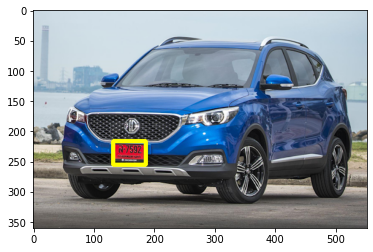

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('/content/car.png')
imageRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                      ## B, G, R ## #สีแดง
lower_color = np.array([0, 0, 240], dtype = "uint8")
upper_color = np.array([60, 30, 255], dtype = "uint8")
obj = cv2.inRange(image, lower_color, upper_color)

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(3,6))
obj1 = cv2.dilate(obj, st, iterations = 4)

regions, hierarchy = cv2.findContours(obj1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for r in regions:
   (x,y,w,h) = cv2.boundingRect(r)
   cv2.rectangle(imageRGB, (x,y), (x+w,y+h), (255,255,0), 5)


plt.imshow(imageRGB)
plt.show()

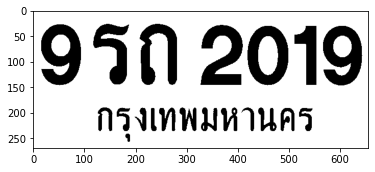

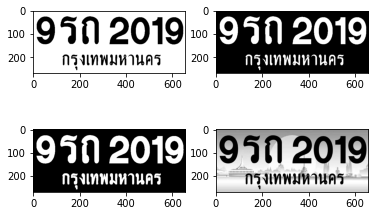

In [ ]:
#ทะเบียนรถ
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/2.jpg', 0)

T= 30
_, binary = cv2.threshold(image,T,255,cv2.THRESH_BINARY)

plt.imshow(binary, cmap="gray")
plt.show()
#
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/2.jpg', 0)

#การตรวจจับวัตถุในภาพสีเทา
T= 30
_, binary = cv2.threshold(image,T,255,cv2.THRESH_BINARY)

# เปลี่ยนวัตถุเป็นสีขาว
bi2 = ~binary

#ขยายโครงสร้าง 3*3
st  = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
obj3 = cv2.dilate(bi2, st, iterations = 1)


plt.subplot(221),plt.imshow(binary, cmap="gray")
plt.subplot(222),plt.imshow(bi2, cmap="gray")
plt.subplot(223),plt.imshow(obj3, cmap="gray")
plt.subplot(224),plt.imshow(image, cmap="gray")

plt.show()


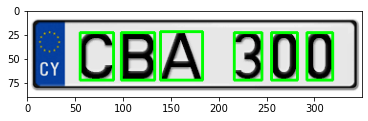

In [ ]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread('/content/car-plate.png', 0)
imageBGR = cv2.imread('/content/car-plate.png') # BGR Image
imageRGB = cv2.cvtColor(imageBGR, cv2.COLOR_BGR2RGB)

T= 30
_, binary = cv2.threshold(image,T,255,cv2.THRESH_BINARY)

bi2 = ~ binary

st  = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
obj3 = cv2.dilate(bi2, st, iterations = 1)

regions, hierarchy = cv2.findContours(obj3, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for reg in regions:
  (x,y,w,h) = cv2.boundingRect(reg)
  if (w<45 and h>45 ): #or (w>15 and w<=40 and h>=40 and h<=50)
    cv2.rectangle(imageRGB, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(imageRGB, cmap="gray")

plt.show()


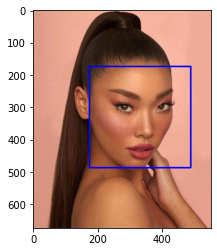

In [ ]:
#ตรวจจับใบหน้า เอไอ
import cv2
import matplotlib.pyplot as plt
import numpy as np

faceAI = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
img = cv2.imread('/content/OVAL-FACE.jpg')

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread('/content/OVAL-FACE.jpg', 0)

faces = faceAI.detectMultiScale(gray, 1.3, 4)
for (x,y,w,h) in faces:
    cv2.rectangle(imgRGB, (x, y), (x+w, y+h),(0, 0, 255), 4)

plt.imshow(imgRGB)
plt.show()

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.0 MB/s eta 0:00:00


1/1 [==============================] - 0s 361ms/step


1/1 [==============================] - 0s 168ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

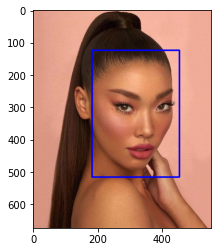

In [ ]:
# เทคนิคแรกๆ ที่ใช้ในการตรวจจับใบหน้า
import cv2
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN

# img = cv2.imread('/content/drive/MyDrive/รูปภาพและวิดีโอ/studentphoto.jfif') # BGR
img = cv2.imread('/content/OVAL-FACE.jpg') # BGR
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # แปลงเป็น RGB แล้วเรียบร้อย

faceDectector = MTCNN() # เรียกใช้ฟังก์ชัน MTCNN()
faces = faceDectector.detect_faces(imgRGB) # กำหนดภาพที่นำเข้าเป็น ภาพแบบที่แปลงเป็น RGB เสร็จแล้ว

# ตัวแปลง face สามารถเปลี่ยนชื่อได้
for face in faces:
  (x, y, w, h) = face['box'] # list [array]
  # w กว้าง, h สูง, x y จุดเริ่มต้น, ทำการตีกรอบ รอบใบหน้า เป็นสีแดง RGB(r,g,b), 10 เป็นขนาดเส้นที่ตีกรอบ
  cv2.rectangle(imgRGB,(x,y),(x+w,y+h),(0, 0, 255),4)

plt.imshow(imgRGB) # กำหนดแสดงผล
plt.show

บทที่3

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/107.7 GB disk)


In [ ]:
!unzip "/content/data.zip" -d "/content/"

Archive:  /content/data.zip
replace /content/data/images/test/17.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/images/test/17.jpg  
replace /content/data/images/test/18.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/data/images/test/18.jpg  
replace /content/data/images/test/19.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/images/test/19.jpg  
  inflating: /content/data/images/test/20.jpg  
  inflating: /content/data/images/train/1.jpg  
  inflating: /content/data/images/train/10.jpg  
  inflating: /content/data/images/train/11.jpg  
  inflating: /content/data/images/train/12.jpg  
  inflating: /content/data/images/train/13.jpg  
  inflating: /content/data/images/train/14.jpg  
  inflating: /content/data/images/train/15.jpg  
  inflating: /content/data/images/train/16.jpg  
  inflating: /content/data/images/train/2.jpg  
  inflating: /content/data/images/train/3.jpg  
  inflating: /content/data/images/train/4.jpg  

In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data coco128_kkulogo.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128_kkulogo.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tra

In [ ]:
pip install clearml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 972.3/972.3 KB 12.8 MB/s eta 0:00:00


In [ ]:
pip install comet_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.9/505.9 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.1/189.1 KB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 14.5 MB/s eta 0:00:00


In [ ]:
!python detect.py --weights /content/best.pt --img 640 --conf 0.5 --source /content/3.jpg

detect: weights=['/content/best.pt'], source=/content/3.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CPU

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.9/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/detect.py", line 98, in run
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
  File "/content/yolo